# Scikit-Learn Practice Exercises
> This notebook offers a set of excercises for different tasks with Scikit-Learn.

Notes:
* There may be more than one different way to answer a question or complete an exercise. 
* Exercises are based off (and directly taken from) the quick [introduction to Scikit-Learn notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb).

For further reference and resources, it's advised to check out the [Scikit-Learn documnetation](https://scikit-learn.org/stable/user_guide.html).

Let's get started.

In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

##Scikit-Learn classification workflow

More specifically, we'll:
1. Get a dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions 

The data we'll be using is [stored on GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/data). We'll start with [`heart-disease.csv`](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv), a dataset which contains anonymous patient data and whether or not they have heart disease.

Explore Data : https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

### 1. Getting a dataset ready

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
heart_disease = pd.read_csv("https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv")

# Check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##Dataset Column Description:








oldpeak ST depression induced by exercise relative to rest
slope the slope of the peak exercise ST segment
ca number of major vessels (0-3) colored by flourosopy
thal

*   age: The person’s age in years
*   sex: The person’s sex (1 = male, 0 = female)
*   cp: chest pain type
— Value 0: asymptomatic
— Value 1: atypical angina
— Value 2: non-anginal pain
— Value 3: typical angina
*   trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
*   chol: The person’s cholesterol measurement in mg/dl
*   fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
*   restecg: resting electrocardiographic results
— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
— Value 1: normal
— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   thalach: The person’s maximum heart rate achieved
*   exang: Exercise induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
*   slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
0: downsloping; 1: flat; 2: upsloping
*   ca: The number of major vessels (0–3)
*   thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)
*   target: Heart disease (1 = no, 0= yes)

Our goal here is to build a machine learning model on all of the columns except `target` to predict `target`.

In essence, the `target` column is our **target variable** (also called `y` or `labels`) and the rest of the other columns are our independent variables (also called `data` or `X`).

And since our target variable is one thing or another (heart disease or not), we know our problem is a classification problem (classifying whether something is one thing or another).

Knowing this, let's create `X` and `y` by splitting our dataframe up.

In [4]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Checking for null values
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

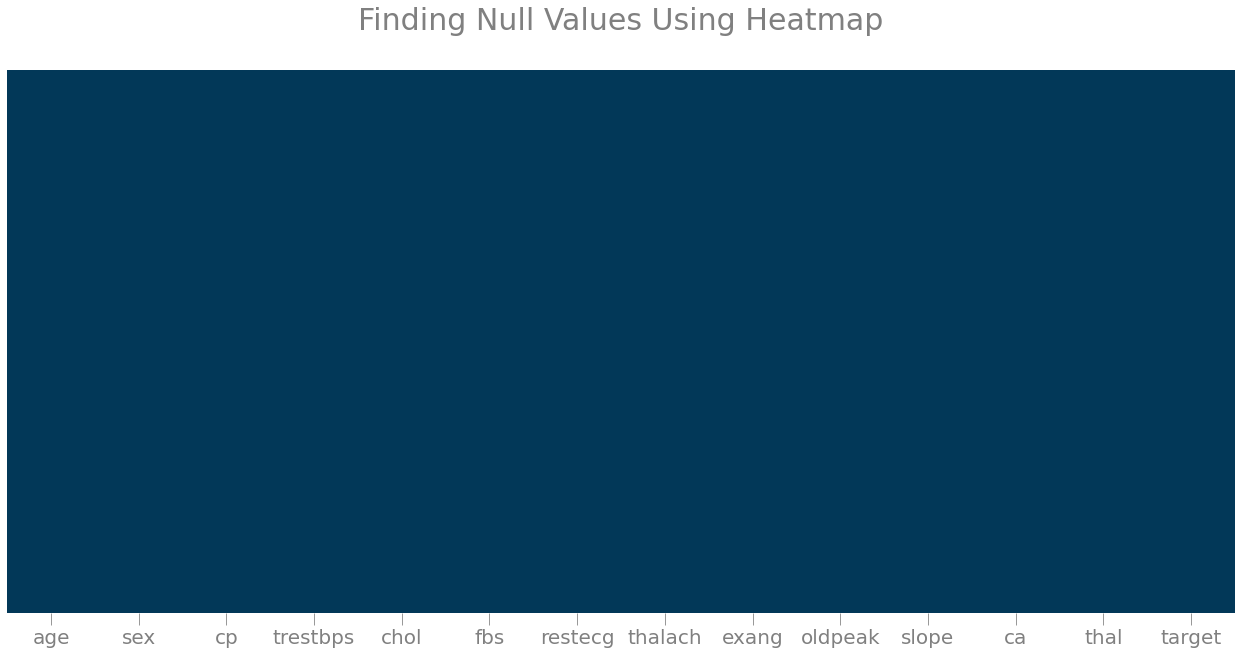

In [6]:
#visualizing Null values if it exists 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(heart_disease.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [7]:
# Create X (all columns except target)
X = heart_disease.drop("target", axis=1)

# Create y (only the target column)
y = heart_disease["target"]

Now we've split our data into `X` and `y`, we'll use Scikit-Learn to split it into training and test sets.

In [8]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

What do you notice about the different shapes of the data?

Since our data is now in training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions on the test data.

To figure out which machine learning model we should use, you can refer to [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

After following the map, you decide to use the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

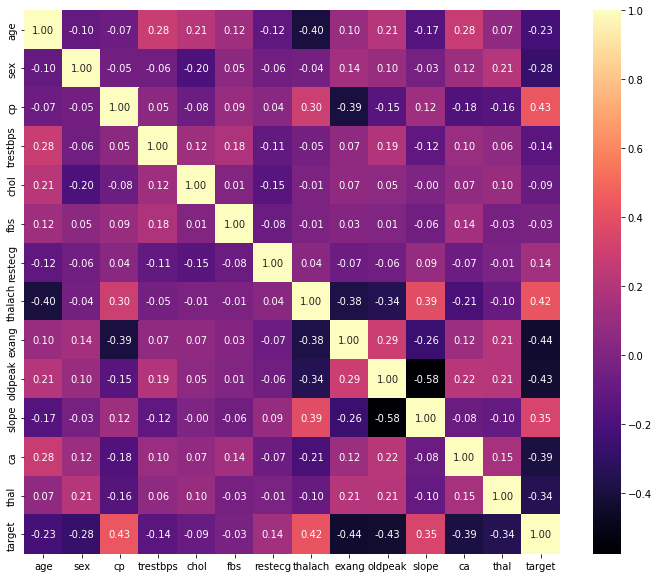

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(heart_disease.corr(),annot=True,cmap="magma",fmt='.2f')

In [66]:
#sns.pairplot(heart_disease,hue='cp')

In [67]:
for i in heart_disease.columns:
    print(i,len(heart_disease[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2




#2. Preparing a machine learning model

In [68]:
# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()

Now you've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [69]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Evaluating predictions is as important making them. Let's check how our model did by comparing the predictions it made on the test data (`y_preds`) to the ground truth labels (`y_test`).

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [73]:
pred_train=clf.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("Confusion Matrix for Training Data:\n", confusion_train)

Confusion Matrix for Training Data:
 [[103   0]
 [  0 124]]


In [74]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test, y_test)

0.8289473684210527

In [75]:
confusion_test=confusion_matrix(y_test, y_preds)
print("Confusion Matrix for Training Data:\n", confusion_test)

Confusion Matrix for Training Data:
 [[27  8]
 [ 5 36]]


* How did you model go? 
* What metric does `score()` return for classifiers? 
* Did your model do better on the training dataset or test dataset?

## Experimenting with different classification models

Now we've quickly covered an end-to-end Scikit-Learn workflow and since experimenting is a large part of machine learning, we'll now try a series of different machine learning models and see which gets the best results on our dataset.

Going through the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we see there are a number of different classification models we can try (different models are in the green boxes).

For this exercise, the models we're going to try and compare are:
* [LinearSVC] https://scikit-learn.org/stable/modules/svm.html#classification
* [KNeighborsClassifier] https://scikit-learn.org/stable/modules/neighbors.html (also known as K-Nearest Neighbors or KNN)
* [SVC] https://scikit-learn.org/stable/modules/svm.html#classification (also known as support vector classifier, a form of [support vector machine]https://en.wikipedia.org/wiki/Support-vector_machine)
* [LogisticRegression] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (despite the name, this is actually a classifier)
* [RandomForestClassifier] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (an ensemble method and what we used above)

We'll follow the same workflow we used above (except this time for multiple models):
1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

**Note:** Since we've already got the data ready, we can reuse it in this section.

In [76]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have

Thanks to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each of our models.

To see which model performs best, we'll do the following:
1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

If you're wondering what it means to instantiate each model in a dictionary, see the example below.

In [77]:
# EXAMPLE: Instantiating a RandomForestClassifier() in a dictionary
example_dict = {"RandomForestClassifier": RandomForestClassifier()} #key:value

# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

# Create an empty dictionary called results
results = {}

Since each model we're using has the same `fit()` and `score()` functions, we can loop through our models dictionary and, call `fit()` on the training data and then call `score()` with the test data.

In [78]:
# EXAMPLE: Looping through example_dict fitting and scoring the model
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

# EXAMPLE: View the results
example_results    

{'RandomForestClassifier': 0.8289473684210527}

In [79]:
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# View the results
results

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7763157894736842,
 'KNN': 0.6973684210526315,
 'SVC': 0.6973684210526315,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8421052631578947}

* Which model performed the best? 
* Do the results change each time you run the cell? 
* Why do you think this is?

Due to the randomness of how each model finds patterns in the data, you might notice different results each time.

Without manually setting the random state using the `random_state` parameter of some models or using a NumPy random seed, every time you run the cell, you'll get slightly different results.

Let's see this in effect by running the same code as the cell above, except this time setting a [NumPy random seed equal to 42](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html).

In [80]:
# Run the same code as the cell above, except this time set a NumPy random seed
# equal to 42
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.5789473684210527,
 'KNN': 0.6973684210526315,
 'SVC': 0.6973684210526315,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8157894736842105}

* Run the cell above a few times, what do you notice about the results? 
* Which model performs the best this time?
* What happens if you add a NumPy random seed to the cell where you called `train_test_split()` (towards the top of the notebook) and then rerun the cell above?

Let's make our results a little more visual.

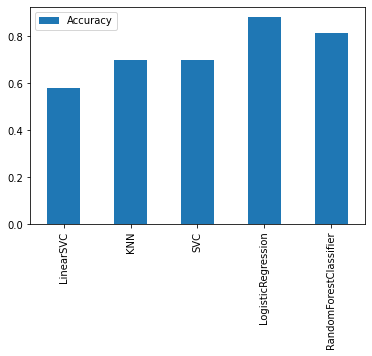

In [81]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

Using `np.random.seed(42)` results in the `LogisticRegression` model perfoming the best (at least on my computer).

Let's tune its hyperparameters and see if we can improve it.

### Hyperparameter Tuning

Remember, if you're ever trying to tune a machine learning models hyperparameters and you're not sure where to start, you can always search something like "MODEL_NAME hyperparameter tuning".

In the case of LogisticRegression, you might come across articles, such as [Hyperparameter Tuning Using Grid Search by Chris Albon](https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/).

The article uses [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) but we're going to be using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

The different hyperparameters to search over have been setup for you in `log_reg_grid` but feel free to change them.

In [82]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

Since we've got a set of hyperparameters we can import `RandomizedSearchCV`, pass it our dictionary of hyperparameters and let it search for the best combination.

In [83]:
# Setup np random seed of 42
np.random.seed(42)

# Import RandomizedSearchCV from sklearn's model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Once `RandomizedSearchCV` has finished, we can find the best hyperparmeters it found using the `best_params_` attributes.

In [84]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [85]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.8947368421052632

After hyperparameter tuning, did the models score improve? What else could you try to improve it? Are there any other methods of hyperparameter tuning you can find for `LogisticRegression`?

### Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using `RandomizedSearchCV` and so far we've only been evaluating our model using the `score()` function which returns accuracy. 

But when it comes to classification, you'll likely want to use a few more evaluation metrics, including:
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

Before we get to these, we'll instantiate a new instance of our model using the best hyerparameters found by `RandomizedSearchCV`. 

In [86]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
clf.fit(X_train, y_train);

Now it's to import the relative Scikit-Learn methods for each of the classification evaluation metrics we're after.

In [87]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

Evaluation metrics are very often comparing a model's predictions to some ground truth labels.

Let's make some predictions on the test data using our latest model and save them to `y_preds`.

In [88]:
# Make predictions on test data and save them
y_preds = clf.predict(X_test)

Time to use the predictions our model has made to evaluate it beyond accuracy.

In [89]:
# Create a confusion matrix using the confusion_matrix function
confusion_matrix(y_test, y_preds)

array([[30,  5],
       [ 3, 38]])

**Challenge:** The in-built `confusion_matrix` function in Scikit-Learn produces something not too visual, how could you make your confusion matrix more visual?

You might want to search something like "how to plot a confusion matrix". Note: There may be more than one way to do this.

In [90]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

/bin/bash: conda: command not found


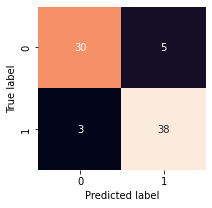

In [91]:
# Create a more visual confusion matrix
# Import seaborn for improving visualisaztion of confusion matrix
import seaborn as sns

# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, # Annotate the boxes
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)    

How about a classification report?

In [92]:
# Create a classification report using the classification_report function
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



**Challenge:** Write down what each of the columns in this classification report are.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

The classification report gives us a range of values for precision, recall and F1 score, time to find these metrics using Scikit-Learn functions.

In [93]:
# Find the precision score of the model using precision_score()
precision_score(y_test, y_preds)

0.8837209302325582

In [94]:
# Find the recall score
recall_score(y_test, y_preds)

0.926829268292683

In [95]:
# Find the F1 score
f1_score(y_test, y_preds)

0.9047619047619047

Confusion matrix: done.
Classification report: done.
ROC (receiver operator characteristic) curve & AUC (area under curve) score: not done.

Let's fix this.

If you're unfamiliar with what a ROC curve, that's your first challenge, to read up on what one is.

In a sentence, a [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of the true positive rate versus the false positive rate.

And the AUC score is the area behind the ROC curve.

Scikit-Learn provides a handy function for creating both of these called [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


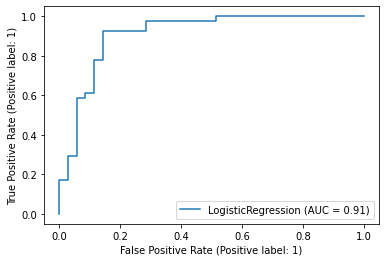

In [96]:
# Plot a ROC curve using our current machine learning model using plot_roc_curve
plot_roc_curve(clf, X_test, y_test);

Beautiful! We've gone far beyond accuracy with a plethora extra classification evaluation metrics.

If you're not sure about any of these, don't worry, they can take a while to understand. That could be an optional extension, reading up on a classification metric you're not sure of.

The thing to note here is all of these metrics have been calculated using a single training set and a single test set. Whilst this is okay, a more robust way is to calculate them using [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

We can calculate various evaluation metrics using cross-validation using Scikit-Learn's [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function along with the `scoring` parameter.

In [97]:
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score

In [98]:
#clf = LogisticRegression(solver="liblinear", C=0.23357214690901212)

In [99]:
# EXAMPLE: By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [100]:
# EXAMPLE: Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8479781420765027

In the examples, the cross-validated accuracy is found by taking the mean of the array returned by `cross_val_score()`.

Now it's time to find the same for precision, recall and F1 score.

In [101]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8215873015873015

In [102]:
# Find the cross-validated recall
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                          cv=5))

cross_val_recall

0.9272727272727274

In [103]:
# Find the cross-validated F1 score
cross_val_f1 = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

0.8705403543192143

### Exporting and importing a trained model

Once you've trained a model, you may want to export it and save it to file so you can share it or use it elsewhere.

One method of exporting and importing models is using the joblib library.

In Scikit-Learn, exporting and importing a trained model is known as [model persistence](https://scikit-learn.org/stable/modules/model_persistence.html).

In [104]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

In [105]:
# Use the dump function to export the trained model to file
dump(clf, "trained-classifier.joblib")

['trained-classifier.joblib']

In [106]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_clf = load("trained-classifier.joblib")

# Evaluate the loaded trained model on the test data
loaded_clf.score(X_test, y_test)

0.8947368421052632

In [107]:
clf.score(X_test, y_test)

0.8947368421052632

##3. Classification for binary label

## 1) hard learner

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [109]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression 0.881578947368421
RandomForestClassifier 0.8157894736842105
SVC 0.6973684210526315
VotingClassifier 0.868421052631579


In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
log_pred_train=log_clf.predict(X_train)
log_confusion_train=confusion_matrix(y_train, log_pred_train)
print("Confusion matrix of Logistic Classifier for Train data :\n", log_confusion_train)

log_pred_test=log_clf.predict(X_test)
log_confusion_test=confusion_matrix(y_test, log_pred_test)
print("Confusion matrix of Logistic Classifier for Test data :\n", log_confusion_test)

Confusion matrix of Logistic Classifier for Train data :
 [[ 81  22]
 [ 11 113]]
Confusion matrix of Logistic Classifier for Test data :
 [[29  6]
 [ 3 38]]


In [112]:
svm_pred_train=svm_clf.predict(X_train)
svm_confusion_train=confusion_matrix(y_train, svm_pred_train)
print("Confusion matrix of Support Vector Machine Classifierfor Train data :\n", svm_confusion_train)

svm_pred_test=svm_clf.predict(X_test)
svm_confusion_test=confusion_matrix(y_test, svm_pred_test)
print("Confusion matrix of Support Vector Machine Classifierfor Test data :\n", svm_confusion_test)

Confusion matrix of Support Vector Machine Classifierfor Train data :
 [[ 42  61]
 [ 18 106]]
Confusion matrix of Support Vector Machine Classifierfor Test data :
 [[16 19]
 [ 4 37]]


In [113]:
rnd_pred_train=rnd_clf.predict(X_train)
rnd_confusion_train=confusion_matrix(y_train, rnd_pred_train)
print("Confusion matrix of Random Forest Classifierfor Train data :\n", rnd_confusion_train)

rnd_pred_test=rnd_clf.predict(X_test)
rnd_confusion_test=confusion_matrix(y_test, rnd_pred_test)
print("Confusion matrix of Random Forest Classifierfor Test data :\n", rnd_confusion_test)

Confusion matrix of Random Forest Classifierfor Train data :
 [[103   0]
 [  0 124]]
Confusion matrix of Random Forest Classifierfor Test data :
 [[27  8]
 [ 6 35]]


In [114]:
voting_pred_train=voting_clf.predict(X_train)
voting_confusion_train=confusion_matrix(y_train, voting_pred_train)
print("Confusion matrix of Voting Classifierfor Train data :\n", voting_confusion_train)

voting_pred_test=voting_clf.predict(X_test)
voting_confusion_test=confusion_matrix(y_test, voting_pred_test)
print("Confusion matrix of Voting Classifierfor Test data :\n", voting_confusion_test)

Confusion matrix of Voting Classifierfor Train data :
 [[ 83  20]
 [  4 120]]
Confusion matrix of Voting Classifierfor Test data :
 [[28  7]
 [ 3 38]]


## 2) soft learner

In [115]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [116]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression 0.881578947368421
RandomForestClassifier 0.8157894736842105
SVC 0.6973684210526315
VotingClassifier 0.868421052631579


In [117]:
log_pred_train=log_clf.predict(X_train)
log_confusion_train=confusion_matrix(y_train, log_pred_train)
print("Confusion matrix of Logistic Classifier for Train data :\n", log_confusion_train)

log_pred_test=log_clf.predict(X_test)
log_confusion_test=confusion_matrix(y_test, log_pred_test)
print("Confusion matrix of Logistic Classifier for Test data :\n", log_confusion_test)

Confusion matrix of Logistic Classifier for Train data :
 [[ 81  22]
 [ 11 113]]
Confusion matrix of Logistic Classifier for Test data :
 [[29  6]
 [ 3 38]]


In [118]:
svm_pred_train=svm_clf.predict(X_train)
svm_confusion_train=confusion_matrix(y_train, svm_pred_train)
print("Confusion matrix of Support Vector Machine Classifierfor Train data :\n", svm_confusion_train)

svm_pred_test=svm_clf.predict(X_test)
svm_confusion_test=confusion_matrix(y_test, svm_pred_test)
print("Confusion matrix of Support Vector Machine Classifierfor Test data :\n", svm_confusion_test)

Confusion matrix of Support Vector Machine Classifierfor Train data :
 [[ 42  61]
 [ 18 106]]
Confusion matrix of Support Vector Machine Classifierfor Test data :
 [[16 19]
 [ 4 37]]


In [119]:
rnd_pred_train=rnd_clf.predict(X_train)
rnd_confusion_train=confusion_matrix(y_train, rnd_pred_train)
print("Confusion matrix of Random Forest Classifierfor Train data :\n", rnd_confusion_train)

rnd_pred_test=rnd_clf.predict(X_test)
rnd_confusion_test=confusion_matrix(y_test, rnd_pred_test)
print("Confusion matrix of Random Forest Classifierfor Test data :\n", rnd_confusion_test)

Confusion matrix of Random Forest Classifierfor Train data :
 [[103   0]
 [  0 124]]
Confusion matrix of Random Forest Classifierfor Test data :
 [[27  8]
 [ 6 35]]


In [120]:
voting_pred_train=voting_clf.predict(X_train)
voting_confusion_train=confusion_matrix(y_train, voting_pred_train)
print("Confusion matrix of Voting Classifierfor Train data :\n", voting_confusion_train)

voting_pred_test=voting_clf.predict(X_test)
voting_confusion_test=confusion_matrix(y_test, voting_pred_test)
print("Confusion matrix of Voting Classifierfor Test data :\n", voting_confusion_test)

Confusion matrix of Voting Classifierfor Train data :
 [[ 92  11]
 [  5 119]]
Confusion matrix of Voting Classifierfor Test data :
 [[28  7]
 [ 3 38]]
